In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [72]:
df = pd.read_csv("https://raw.githubusercontent.com/JPalfonsos/tygua/main/TY%20Tracking%20iBuyers%20(Habi%2C%20Flat%20%26%20Clikalia)%20-%20202208%20-%20Database.csv")

#pd.set_option("display.max_rows", None)

df.head()

,REFERENCE,LINK,TAG,ADDRESS,ZONE,CITY,DESCRIPTION,CONDOMINIUM,ADMINISTRATION,STRATA,AGE,REMODELED,AREA,ROOMS,BATHROOMS,GARAGES,ELEVATORS,TYPE OF PROPERTY,STORAGE,PORTER'S LODGE,LAUNDRY AREA,GAS,PARKING LOT,FULL PRICE,FINAL PRICE,CREATION,OBSERVATIONS,PRICE 1,UPDATE 1,PRICE 2,UPDATE 2,PRICE 3,UPDATE 3,PRICE 4,UPDATE 4,PRICE 5,UPDATE 5,PRICE 6,UPDATE 6,PRICE 7,UPDATE 7
0,3529797947,https://habi.co/venta-apartamentos/3529797947/...,NaN,Carrera 57 # 38 - 290,Hospital mental,Bello,"Apartamento en venta de 83.82 m2, con vista ex...",Conjunto Residencial Puerto Nuevo P.H.,$237.900,4,2 años,Si,84 m2,2,2,1,2,Apartamento,1,24 hrs,Comunal,Si,Si,$328.000.000,$328.000.000,15/8/2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2454394011,https://habi.co/venta-apartamentos/2454394011/...,Externo,Calle 55Sur # 104 - 48,El porvenir,Bogotá,"Apartamento en venta de 46m2, con vista interi...",Alameda del porvenir etapa 1,$50.000,2,9 años,Si,55 m2,2,1,No Tiene,No Tiene,Apartamento,No Tiene,24 hrs,No Tiene,NaN,No,$120.000.000,$120.000.000,13/8/2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2845532389,https://habi.co/venta-apartamentos/2845532389/...,Muy pronto,Carrera 97F # 34A - 30 SUR,Calandaima,Bogotá,"Apartamento en venta de 35m2, con vista exteri...",Condominios I Tierra buena,$58.600,2,14 años,Si,35 m2,2,1,No Tiene,No Tiene,Apartamento,No Tiene,24 hrs,No Tiene,Si,Si,$113.000.000,$113.000.000,13/8/2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2889399817,https://habi.co/venta-apartamentos/2889399817/...,NaN,Calle 60Sur #70-90,Arborizadora,Bogotá,"Apartamento en venta de 45 m2, con vista exter...",El Oasis,$137.700,3,7 años,Si,45 m2,3,1,No Tiene,1,Apartamento,No Tiene,24 hrs,No Tiene,Si,NaN,$170.000.000,$170.000.000,13/8/2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2956503231,https://habi.co/venta-apartamentos/2956503231/...,Muy pronto,Carrera 100 # 50B-45sur,El porvenir,Bogotá,"Apartamento en venta de 45m2, con vista interi...",Senderos del Porvenir 4,$56.600,2,13 años,Si,45 m2,2,1,No Tiene,No Tiene,Apartamento,No Tiene,24 hrs,No Tiene,Si,Si,$112.000.000,$112.000.000,15/8/2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
df = pd.read_csv("https://raw.githubusercontent.com/JPalfonsos/tygua/main/TY%20Tracking%20iBuyers%20(Habi%2C%20Flat%20%26%20Clikalia)%20-%20202208%20-%20Database.csv")
#drop last columns
df = df.iloc[: , 1:-14]
pd.set_option('display.max_columns', None) 
#string handle (ADMINISTRATION,AGE,REMODELED, AREA, FULL PRICE,GARAGES, ELEVATORS,TYPE OF PROPERTY, STORAGE,PORTERS LODGE,GAS, PARKING LOT)
#Replace only:ADMINISTRATION, AGE, AREA, FULL PRICE

#ADMINISTRATION
df['ADMINISTRATION'] = df['ADMINISTRATION'].fillna(0)
df['ADMINISTRATION'] = df[['ADMINISTRATION']].replace('[\$\,\.]', '', regex=True).astype(int)
#AGE
df['AGE'] = df[['AGE']].replace(" años", '', regex=True).astype(int)
#AREA
df["AREA"] = df[["AREA"]].replace(" m2", "", regex = True).astype(int)
#FULL PRICE
df["FULL PRICE"] = df[["FULL PRICE"]].replace('[\$\,\.]', "", regex=True).astype(int)
df['TAG'] = df['TAG'].fillna("HABI")
df.head()

,LINK,TAG,ADDRESS,ZONE,CITY,DESCRIPTION,CONDOMINIUM,ADMINISTRATION,STRATA,AGE,REMODELED,AREA,ROOMS,BATHROOMS,GARAGES,ELEVATORS,TYPE OF PROPERTY,STORAGE,PORTER'S LODGE,LAUNDRY AREA,GAS,PARKING LOT,FULL PRICE,FINAL PRICE,CREATION,OBSERVATIONS
0,https://habi.co/venta-apartamentos/3529797947/...,HABI,Carrera 57 # 38 - 290,Hospital mental,Bello,"Apartamento en venta de 83.82 m2, con vista ex...",Conjunto Residencial Puerto Nuevo P.H.,237900,4,2,Si,84,2,2,1,2,Apartamento,1,24 hrs,Comunal,Si,Si,328000000,$328.000.000,15/8/2022,NaN
1,https://habi.co/venta-apartamentos/2454394011/...,Externo,Calle 55Sur # 104 - 48,El porvenir,Bogotá,"Apartamento en venta de 46m2, con vista interi...",Alameda del porvenir etapa 1,50000,2,9,Si,55,2,1,No Tiene,No Tiene,Apartamento,No Tiene,24 hrs,No Tiene,NaN,No,120000000,$120.000.000,13/8/2022,NaN
2,https://habi.co/venta-apartamentos/2845532389/...,Muy pronto,Carrera 97F # 34A - 30 SUR,Calandaima,Bogotá,"Apartamento en venta de 35m2, con vista exteri...",Condominios I Tierra buena,58600,2,14,Si,35,2,1,No Tiene,No Tiene,Apartamento,No Tiene,24 hrs,No Tiene,Si,Si,113000000,$113.000.000,13/8/2022,NaN
3,https://habi.co/venta-apartamentos/2889399817/...,HABI,Calle 60Sur #70-90,Arborizadora,Bogotá,"Apartamento en venta de 45 m2, con vista exter...",El Oasis,137700,3,7,Si,45,3,1,No Tiene,1,Apartamento,No Tiene,24 hrs,No Tiene,Si,NaN,170000000,$170.000.000,13/8/2022,NaN
4,https://habi.co/venta-apartamentos/2956503231/...,Muy pronto,Carrera 100 # 50B-45sur,El porvenir,Bogotá,"Apartamento en venta de 45m2, con vista interi...",Senderos del Porvenir 4,56600,2,13,Si,45,2,1,No Tiene,No Tiene,Apartamento,No Tiene,24 hrs,No Tiene,Si,Si,112000000,$112.000.000,15/8/2022,NaN


In [4]:
#Outlier change
df.at[185, 'ADMINISTRATION'] = 110000
df.iloc[185][["ADMINISTRATION"]]

ADMINISTRATION    110000
Name: 185, dtype: object

*Basic findings*

#### Trying to discover the pattern of the ideal property, based on median or 75%

- Strata: 3
- Rooms: 2-3
- Bathrooms: 1-2
- Age: 5 to 10
- Area: below 70m2
- Price > above $185m*

Important: Price
- There is bias from Habi to hold properties that are above 185 mill cop, this is counter intuitive because you can suppose they prefer cheap houses but less than 25% of the properties are 134 mill cop

Is the common pattern a sale success for Habi?

How hidden features affect sales behavior (floor on which it is located, Neighboorhood)?


- The spread could be the time
- what proportion is owned by Habi
- Qué tanto valor agrega Habi para que la propiedad sea vendida a más precio
- price / area metersquared
- monitor the spread of new properties and old, in some certain áreas

In [5]:
#limit decimals to one
pd.set_option('display.float_format', lambda x: '%.1f' % x)

#set comma separator for thousands

df.describe().T.style.format('{0:,.1f}')

,count,mean,std,min,25%,50%,75%,max
ADMINISTRATION,825.0,"115,136.3","141,365.4",0.0,0.0,"70,000.0","176,700.0","751,900.0"
STRATA,825.0,3.2,1.1,1.0,2.0,3.0,4.0,6.0
AGE,825.0,11.2,8.1,0.0,5.0,9.0,15.0,39.0
AREA,825.0,60.9,18.9,21.0,47.0,56.0,69.0,170.0
ROOMS,825.0,2.6,0.6,1.0,2.0,3.0,3.0,5.0
BATHROOMS,825.0,1.7,0.6,1.0,1.0,2.0,2.0,4.0
FULL PRICE,825.0,"230,933,218.9","119,221,247.7","79,000,000.0","135,000,000.0","185,000,000.0","315,000,000.0","685,000,000.0"


#### From the correlation

- Expensive houses choosed by Habi are the ones with less rooms, this means they are not picking the expensive houses depending of the quantity of the rooms. Or does this follows a market common?
- The positive relation between m2 and Strata is positive but only until Strata 4, therefore the relation brokes, this is similar between strata and rooms
 

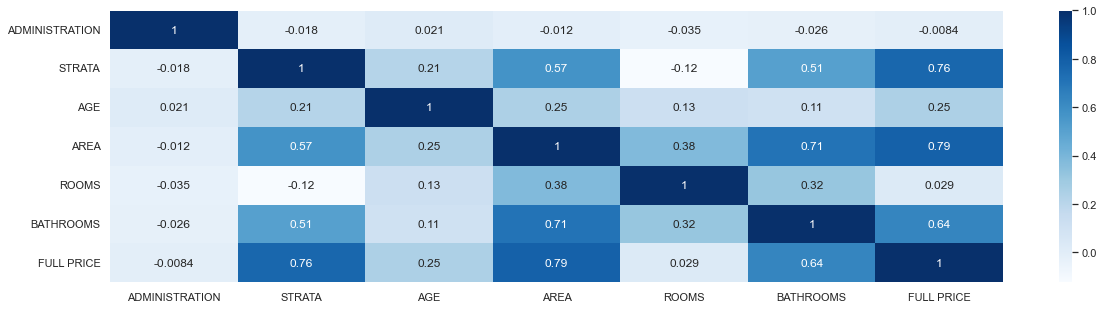

In [31]:
df_cor = df.corr()
fig, ax = plt.subplots(figsize=(20,5))
sns.heatmap(df_cor, annot = True, cmap = "Blues")
plt.show()

Interesting foundings:
There is any house/apartment that pays administation fee that have 5 rooms

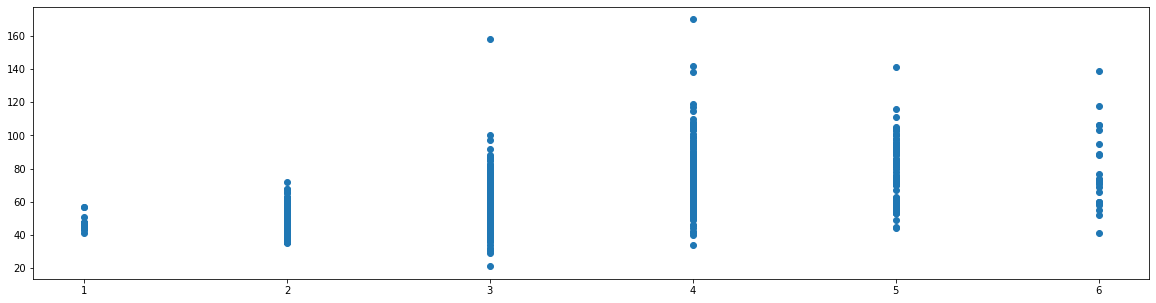

In [7]:
fig, ax = plt.subplots(figsize=(20,5))
plt.scatter(df[["STRATA"]], df["AREA"])
plt.show()

densidad de cuartos por strata

deficit habitacional

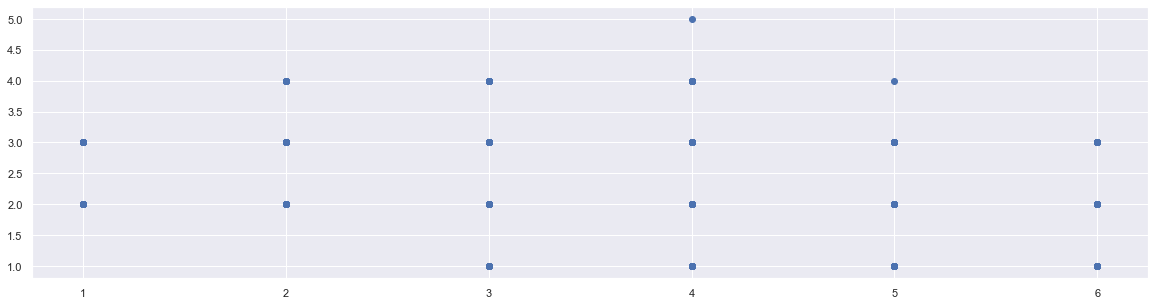

In [10]:
fig, ax = plt.subplots(figsize=(20,5))
plt.scatter(df[["STRATA"]], df["ROOMS"])
plt.show()

In [ ]:
sns.displot(df, x = "STRATA", col = "TAG", hue = "TAG", fill = True)

Acumulation of properties

Here we can see that we already match properties betwen Externo and the rest

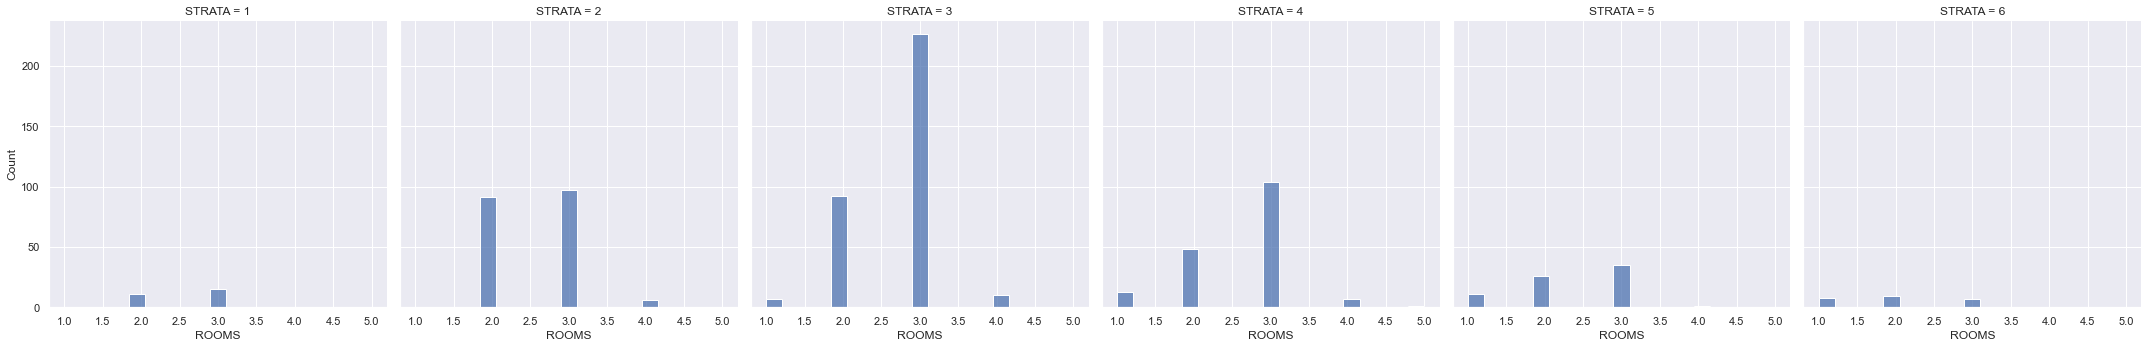

In [74]:
sns.displot(df, x = "ROOMS", col = "STRATA", fill = True


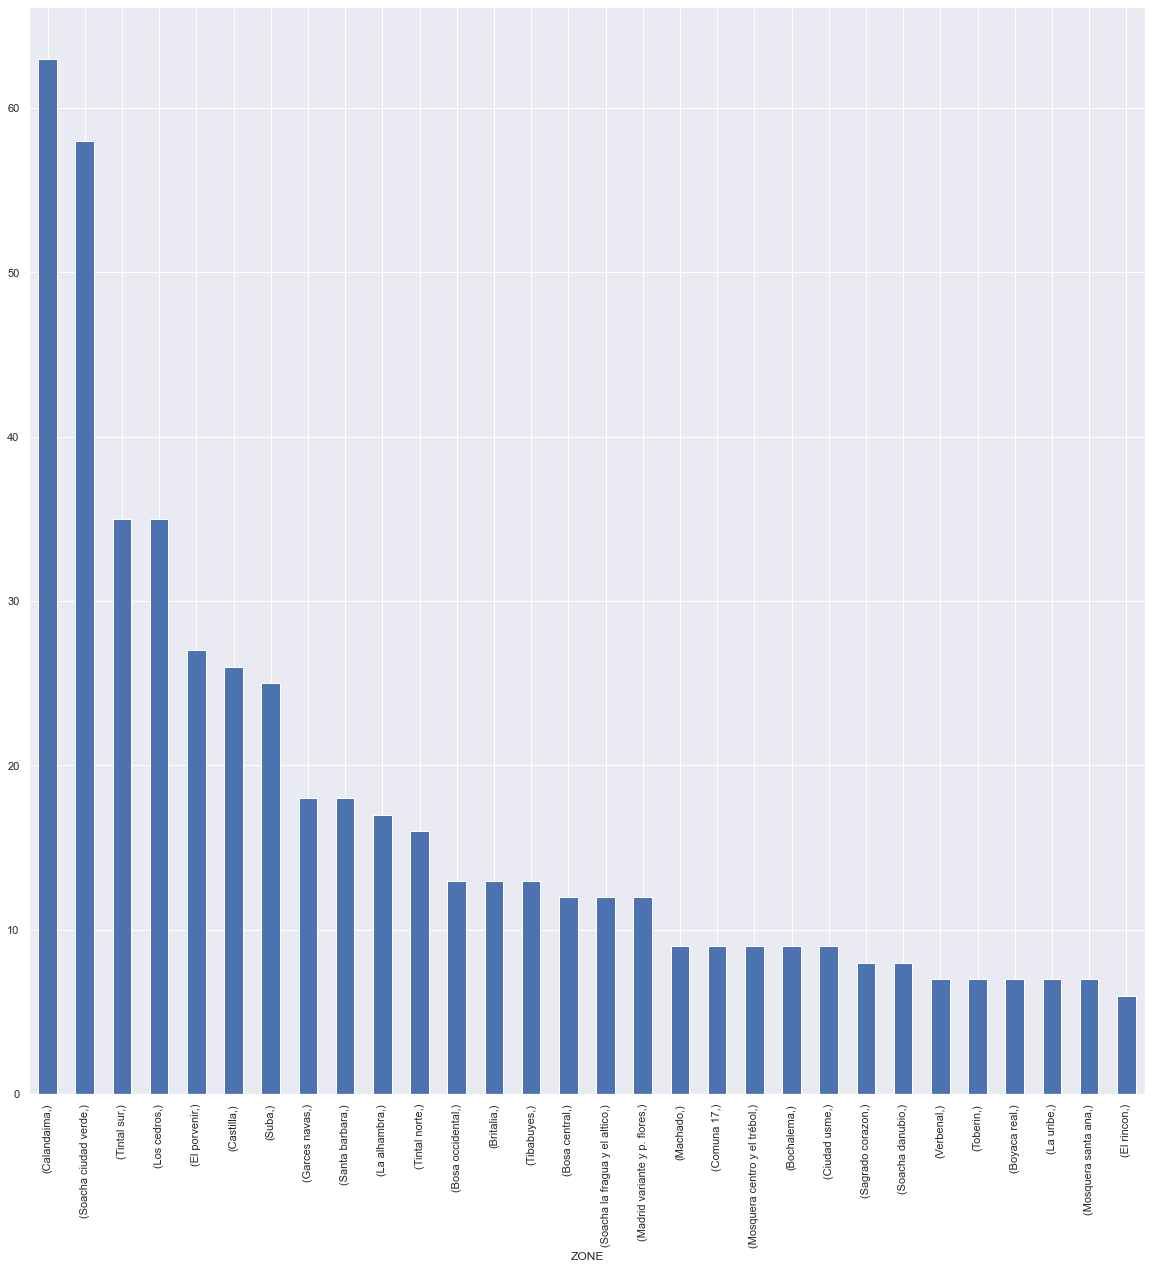

In [71]:
df1 = df[['ZONE']].value_counts()
df['ZONE'].value_counts().plot(kind="bar")
#plt.show()
df1[:30].plot(kind="bar")
plt.show()

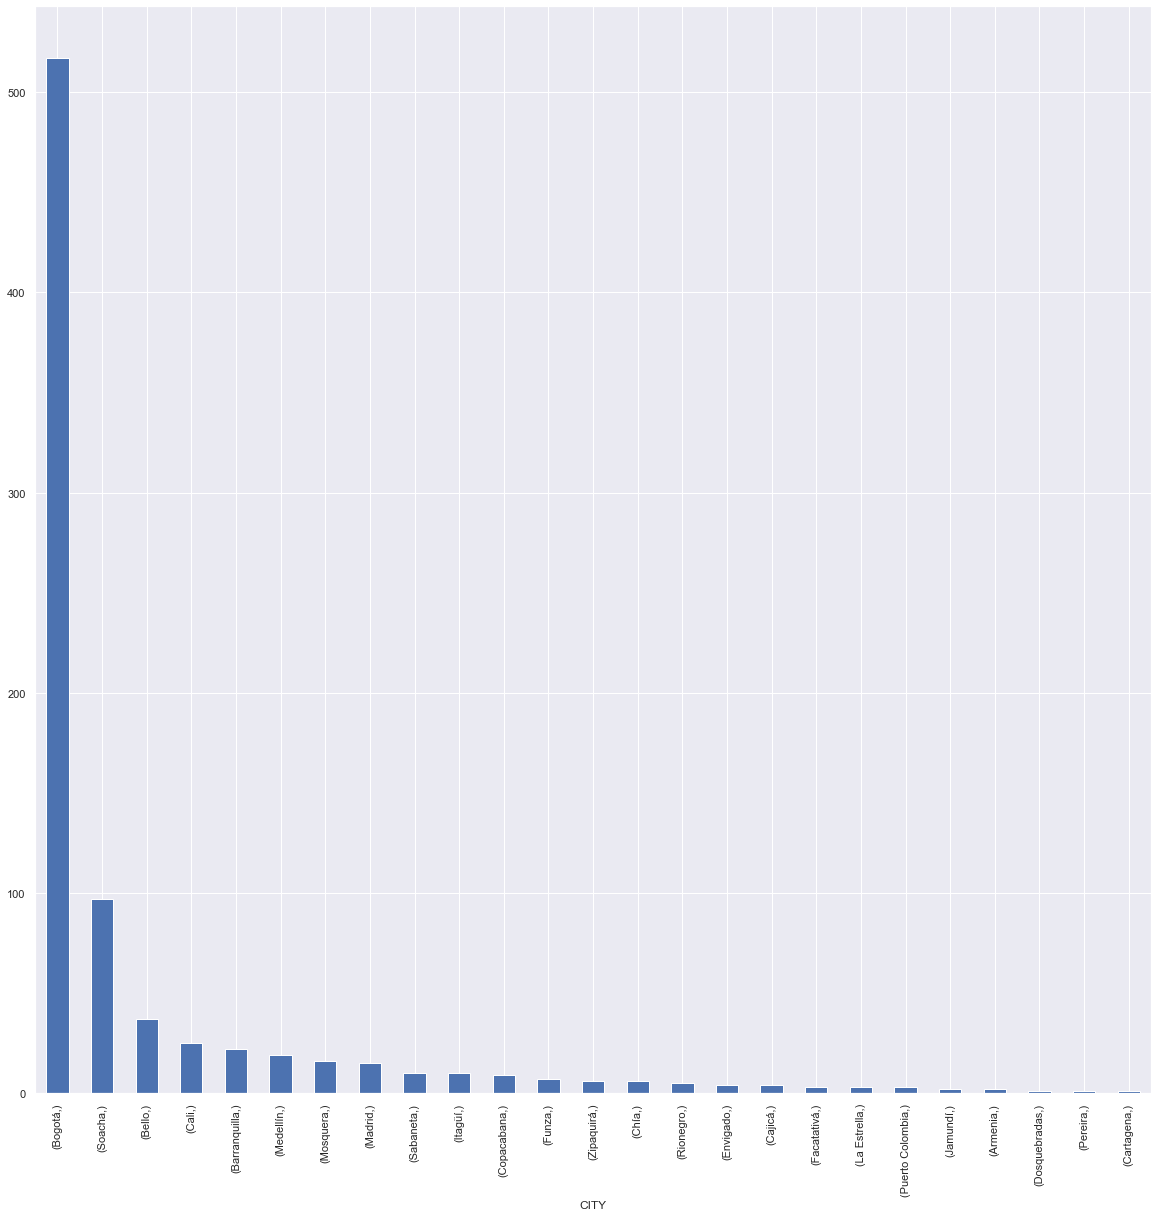

In [75]:
df1 = df[['CITY']].value_counts()
df['CITY'].value_counts().plot(kind="bar")
#plt.show()
df1[:30].plot(kind="bar")
plt.show()

Question 1:
### How to work with addresses?
https://www.movilidadbogota.gov.co/web/SIMUR/excepcionesTemporal/radicarSolicitud/